# Bank of Japan accounts

- https://www.boj.or.jp/en/statistics/boj/other/acmai/release/2020/ac200710.htm/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from bs4 import BeautifulSoup
import requests
import numpy as np
import re

In [2]:
url ='https://www.boj.or.jp/en/statistics/boj/other/acmai/release/2020/ac200710.htm/'

## 1. pd.read_html

In [3]:
pd_html = pd.read_html(url)

### 1.1 Assets

In [4]:
pd_html[0]

,0,1
0,Gold,441253409
1,Cash1,215139362
2,Japanese government securities,515864916944
3,Commercial paper2,4281124370
4,Corporate bonds3,4388932854
5,Pecuniary trusts (stocks held as trust property)4,669482342
6,Pecuniary trusts (index-linked exchange-traded...,33206504054
7,Pecuniary trusts (Japan real estate investment...,619608007
8,Loans (excluding those to the Deposit Insuranc...,71860300000
9,Foreign currency assets7,18763152336


### 1.2  Liabilities

In [5]:
pd_html[1]

,0,1
0,Banknotes,113509908671
1,Current deposits,446341516593
2,Other deposits9,37423281482
3,Deposits of the government,37814688274
4,Payables under repurchase agreements,5543970307
5,Others10,705295936
6,Provisions,6410145786
7,Capital,100000
8,Legal and special reserves,3316784625
9,Total,651065691679


### 1.3 Breakdown of Japanese government securities

In [6]:
pd_html[2]

,0,1
0,Japanese government bonds,480281568815
1,Treasury discount bills,35583348129


### 1.4 Loan support program

In [7]:
pd_html[3]

,0,1
0,Fund-Provisioning Measure to Support Strengthe...,8687367440
1,Fund-Provisioning Measure to Stimulate Bank Le...,44222900000
2,Total,52910267440


### 1.5 Loans by Funds-Supplying Operations against Pooled Collateral (including funds provided under the fixed-rate method), Funds-Supplying Operation to Support Financial Institutions in Disaster Areas, Funds-Supplying Operation to Support Financial Institutions in Disaster Areas of the 2016 Kumamoto Earthquake and Special Funds-Supplying Operations to Facilitate Financing in Response to the Novel Coronavirus	

In [8]:
pd_html[4]

,0,1
0,Loans by Funds-Supplying Operations against Po...,21543000000


# 2. Find only table

In [9]:
url ='https://www.boj.or.jp/en/statistics/boj/other/acmai/release/2020/ac200710.htm/'

In [10]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
tables = soup.find_all('div', {'main'})

In [11]:
tables

[<div class="main">
 <!-- 日本語/英語切替 -->
 <!-- コンテンツ -->
 <!-- [START] CONTENT_1 --><p>July 14, 2020<br/>
     Bank of Japan</p>
 <table><caption class="unit2">
 <span>Assets</span>
 <span>(thousand yen)</span>
 </caption>
 <tbody>
 <tr>
 <th class="w50" scope="row">Gold</th>
 <td class="txt-right">441,253,409</td>
 </tr><tr>
 <th scope="row">Cash<sup>1</sup></th>
 <td class="txt-right">215,139,362</td>
 </tr><tr>
 <th scope="row">Japanese government securities</th>
 <td class="txt-right">515,864,916,944</td>
 </tr><tr>
 <th scope="row">Commercial paper<sup>2</sup></th>
 <td class="txt-right">4,281,124,370</td>
 </tr><tr>
 <th scope="row">Corporate bonds<sup>3</sup></th>
 <td class="txt-right">4,388,932,854</td>
 </tr><tr>
 <th scope="row">Pecuniary trusts (stocks held as trust property)<sup>4</sup></th>
 <td class="txt-right">669,482,342</td>
 </tr><tr>
 <th scope="row">Pecuniary trusts (index-linked exchange-traded funds held as trust property)<sup>5</sup></th>
 <td class="txt-right">3

## 3. List 2020 reporting

In [12]:
url = 'https://www.boj.or.jp/en/statistics/boj/other/acmai/release/2020/index.htm/'

In [13]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
soup.title
#soup.find_all('div', {'main'})

<title>Bank of Japan Accounts (Every Ten Days) 2020  : 日本銀行 Bank of Japan</title>

In [14]:
a_tags = soup.find_all('a', href=re.compile('^/en/statistics/boj/other/acmai/release/'))
for tag in a_tags:
    href = tag.get('href')
    print(href)

/en/statistics/boj/other/acmai/release/index.htm
/en/statistics/boj/other/acmai/release/2020/ac200820.htm
/en/statistics/boj/other/acmai/release/2020/ac200810.htm
/en/statistics/boj/other/acmai/release/2020/ac200731.htm
/en/statistics/boj/other/acmai/release/2020/ac200720.htm
/en/statistics/boj/other/acmai/release/2020/ac200710.htm
/en/statistics/boj/other/acmai/release/2020/ac200630.htm
/en/statistics/boj/other/acmai/release/2020/ac200620.htm
/en/statistics/boj/other/acmai/release/2020/ac200610.htm
/en/statistics/boj/other/acmai/release/2020/ac200531.htm
/en/statistics/boj/other/acmai/release/2020/ac200520.htm
/en/statistics/boj/other/acmai/release/2020/ac200510.htm
/en/statistics/boj/other/acmai/release/2020/ac200430.htm
/en/statistics/boj/other/acmai/release/2020/ac200420.htm
/en/statistics/boj/other/acmai/release/2020/ac200410.htm
/en/statistics/boj/other/acmai/release/2020/ac200331.htm
/en/statistics/boj/other/acmai/release/2020/ac200320.htm
/en/statistics/boj/other/acmai/release/

## 4. List 2020 and 2019

In [15]:
url = 'https://www.boj.or.jp/en/statistics/boj/other/acmai/release/2020/index.htm/'
response = requests.get(url, timeout=10)
soup = BeautifulSoup(response.content, 'html.parser')

In [19]:
for year in range(18,21):
    url = 'https://www.boj.or.jp/en/statistics/boj/other/acmai/release/20%s/index.htm/' % year
    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.text, 'lxml')
    print(soup.title)
    individual_url = '^/en/statistics/boj/other/acmai/release/20%s'%year
    a_tags = soup.find_all('a', href=re.compile(individual_url))
    for tag in a_tags:
        href = tag.get('href')
        #if href.endswith('.htm'):
            #print(href)

<title>Bank of Japan Accounts (Every Ten Days) 2018  : 日本銀行 Bank of Japan</title>
<title>Bank of Japan Accounts (Every Ten Days) 2019  : 日本銀行 Bank of Japan</title>
<title>Bank of Japan Accounts (Every Ten Days) 2020  : 日本銀行 Bank of Japan</title>


# 5. Download 2020 data

## 5.1 Assets

In [51]:
for year in range(20,21):
    url = 'https://www.boj.or.jp/en/statistics/boj/other/acmai/release/20%s/index.htm/' % year
    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.text, 'lxml')
    individual_url = '^/en/statistics/boj/other/acmai/release/20%s'%year
    a_tags = soup.find_all('a', href=re.compile(individual_url))
    

    #Emtpy DF using 2020-07-10 data
    df_url ='https://www.boj.or.jp/en/statistics/boj/other/acmai/release/2020/ac200710.htm/'
    df_pd_html = pd.read_html(df_url)
    index_col = df_pd_html[0].iloc[:,0]
    empty_df = pd.DataFrame(index=index_col)
    empty_df.index = [re.split(r'(\d+)', s)[0] for s in empty_df.index]
    
    dates = []
    for tag in a_tags:
        href = tag.get('href')
        date = href.split('200')[1].split('.')[0]
        dates.append(date)
        if href.endswith('.htm'):
            url_download = "https://www.boj.or.jp/"+href            
            pd_html = pd.read_html(url_download)
            pd_html_data = pd_html[0].set_index(0)
            pd_html_data.index = [re.split(r'(\d+)', s)[0] for s in pd_html_data.index]
            empty_df = pd.merge(empty_df, pd_html_data, left_index=True, right_index=True, how='outer')
            empty_df.columns = dates
empty_df.columns = [pd.to_datetime(x, format='%Y%m%d') for x in dates_list]

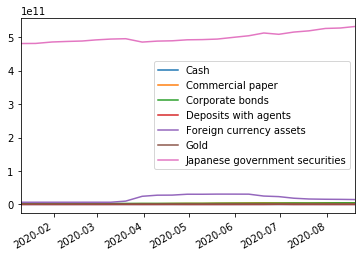

In [56]:
empty_df.T.iloc[:, :7].plot()

In [57]:
#empty_df.to_csv('BOJ_BS_assets_2020.csv')

## 5.2 Download 2020 Loan support

In [58]:
for year in range(20,21):
    url = 'https://www.boj.or.jp/en/statistics/boj/other/acmai/release/20%s/index.htm/' % year
    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.text, 'lxml')
    individual_url = '^/en/statistics/boj/other/acmai/release/20%s'%year
    a_tags = soup.find_all('a', href=re.compile(individual_url))
    
    
    df_url ='https://www.boj.or.jp/en/statistics/boj/other/acmai/release/2020/ac200710.htm/'
    df_pd_html = pd.read_html(df_url)
    index_col = df_pd_html[4].iloc[:,0]
    empty_df = pd.DataFrame(index=index_col)
    
    dates = []
    for tag in a_tags:
        href = tag.get('href')
        date = href.split('200')[1].split('.')[0]
        dates.append(date)
        if href.endswith('.htm'):
            url_download = "https://www.boj.or.jp/"+href            
            pd_html = pd.read_html(url_download)
            pd_html_data = pd_html[4].set_index(0)
            pd_html_data.index = [re.split(r'(\d+)', s)[0] for s in pd_html_data.index]
            empty_df = pd.merge(empty_df, pd_html_data, left_index=True, right_index=True, how='outer')
            empty_df.columns = dates

In [21]:
empty_df.iloc[2].dropna().to_csv('BOJ_loansupport.csv')

/Users/corybaird/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
